<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#581845 ;font-family:newtimeroman;color:white;font-size:300%;text-align:center;border-radius:60px 1px;"> Overview </p> 
    
<ul style = color:#581845;font-size:120%;>
    <li>This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.</li>
    
</ul>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
EDA
</p>
</div>

In [18]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [19]:
os.getcwd()

'C:\\Users\\Hossam'

In [20]:
df = pd.read_csv(r'D:\Drug Classification\ml-dev\drug200.csv')
# First 5 rows
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [21]:
# Last 5 rows
df.tail(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [22]:
# Columns data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [23]:
# Statistical Info for int data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [24]:
# Columns names
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [25]:
# Number of rows and columns
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 200 rows and 6 columns.


In [26]:
# Check for null values
print('Is there any missing values:',df.isnull().sum().any())

Is there any missing values: False


In [27]:
# This will print the most common value for each column 
columns = ['Age', 'Sex', 'BP', 'Cholesterol']

for column in columns:
    print(f"Nost common value for '{column}':\n{df[column].value_counts().head(1)}\n")

Nost common value for 'Age':
Age
47    8
Name: count, dtype: int64

Nost common value for 'Sex':
Sex
M    104
Name: count, dtype: int64

Nost common value for 'BP':
BP
HIGH    77
Name: count, dtype: int64

Nost common value for 'Cholesterol':
Cholesterol
HIGH    103
Name: count, dtype: int64



In [28]:
age_sex = df.groupby(['Age', 'Sex'])['Sex'].count().sort_values(ascending=False).head(2).reset_index(name='count')
age_sex

,Age,Sex,count
0,28,F,6
1,23,M,6


The most common age for men is 28 and for females is 23.

In [29]:
age_bp = df.groupby(['Age', 'BP'])['BP'].count().sort_values(ascending=False).head(3).reset_index(name='count')
age_bp

,Age,BP,count
0,47,LOW,6
1,50,NORMAL,4
2,23,NORMAL,4


Most people in the age of 47 have low blood pressure and in the age of 50, 23 have normal blood pressure.

In [30]:
age_cholesterol = df.groupby(['Age', 'Cholesterol'])['Cholesterol'].count().sort_values(ascending=False).head(3).reset_index(name='count')
age_cholesterol

,Age,Cholesterol,count
0,28,HIGH,6
1,23,HIGH,6
2,47,HIGH,5


Most people in the age of 28, 23 and 47 have high cholesterol.

In [31]:
age_na = df.groupby(['Age', 'Na_to_K'])['Na_to_K'].count().sort_values(ascending=False).head(3).reset_index(name='count')
age_na

,Age,Na_to_K,count
0,15,9.084,1
1,55,7.261,1
2,51,11.343,1


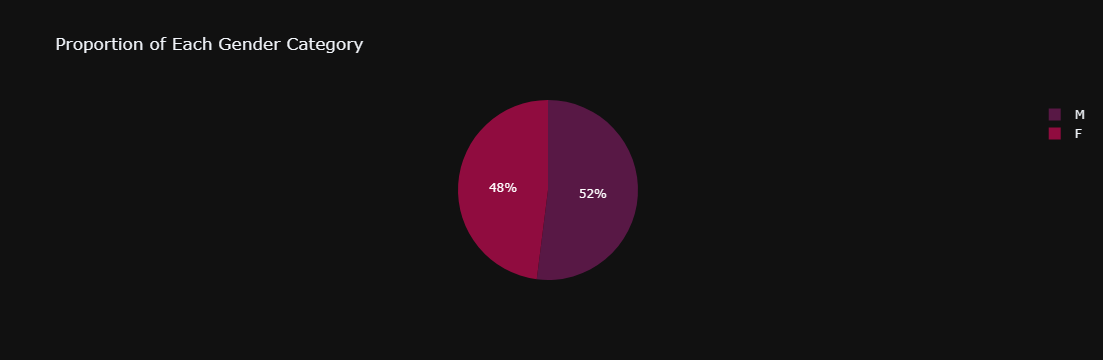

In [32]:
# Assuming 'Sex' column contains the gender categories and you want to count them
gender_counts = df['Sex'].value_counts().reset_index()
gender_counts.columns = ['Sex', 'Count']

# Define colors for each category
colors = ['#581845', '#900C3F']  # Specify colors for Male and Female respectively

# Plotting the pie chart with specified colors
fig_pie = px.pie(gender_counts, values='Count', names='Sex', title='Proportion of Each Gender Category', template='plotly_dark')
fig_pie.update_traces(marker=dict(colors=colors))
fig_pie.show()


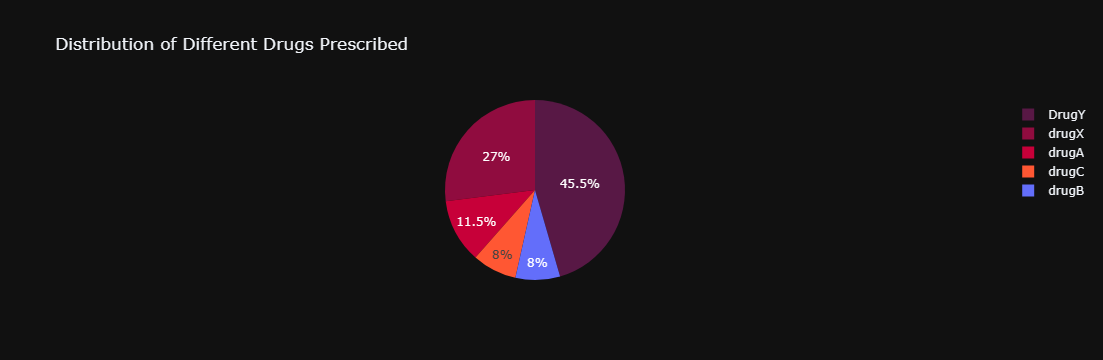

In [33]:

# Count occurrences of each drug
drug_counts = df['Drug'].value_counts().reset_index()

# Renaming columns for clarity
drug_counts.columns = ['Drug', 'Count']

# Plotting pie chart with specific color
colors = ['#581845', '#900C3F', '#C70039', '#FF5733']  # Add more colors if needed

# Plotting pie chart with specific colors for each sector
fig_pie_drug = px.pie(drug_counts, values='Count', names='Drug', title='Distribution of Different Drugs Prescribed',template='plotly_dark')
fig_pie_drug.update_traces(marker=dict(colors=colors))  # Setting different colors for each sector
fig_pie_drug.show()


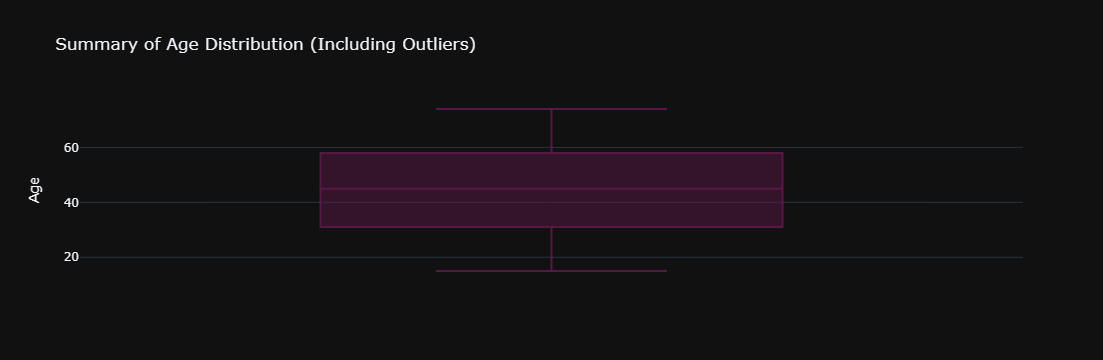

In [34]:
fig = px.box(df, y='Age', title='Summary of Age Distribution (Including Outliers)',template='plotly_dark')
fig.update_traces(marker=dict(color='#581845'))
fig.update_layout(yaxis_title='Age')
fig.show()

The oldest age is 74, The youngest age is 15, median age is 45.

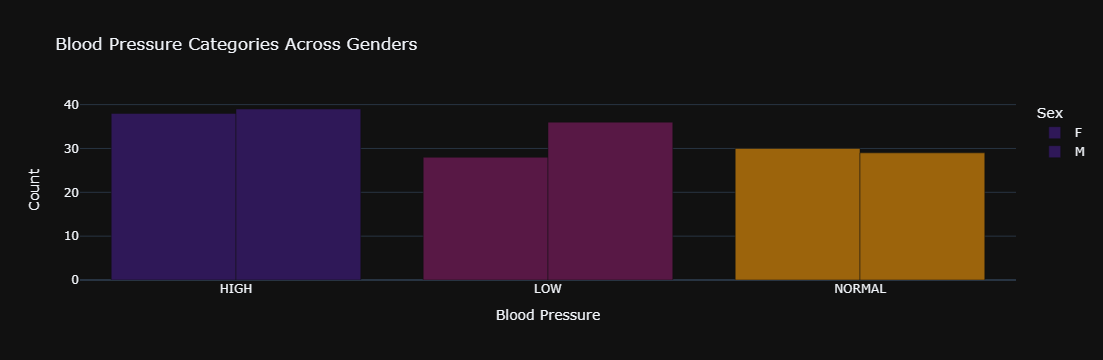

In [35]:
grouped = df.groupby(['BP', 'Sex']).size().unstack().reset_index()

# Creating the grouped bar chart
fig = px.bar(grouped, x='BP', y=['F', 'M'], barmode='group', title='Blood Pressure Categories Across Genders',template='plotly_dark')
fig.update_layout(xaxis_title='Blood Pressure', yaxis_title='Count', legend_title='Sex')

# Changing the color of the bars
fig.update_traces(marker_color=['#2f1858','#581845', '#9C640C'])  # Assigning colors to each gender

fig.show()

There are 29 men and 30 women who have normal blood pressure, 36 men and 28 women who have low blood pressure,  39 men and 38 women who have high blood pressure. 

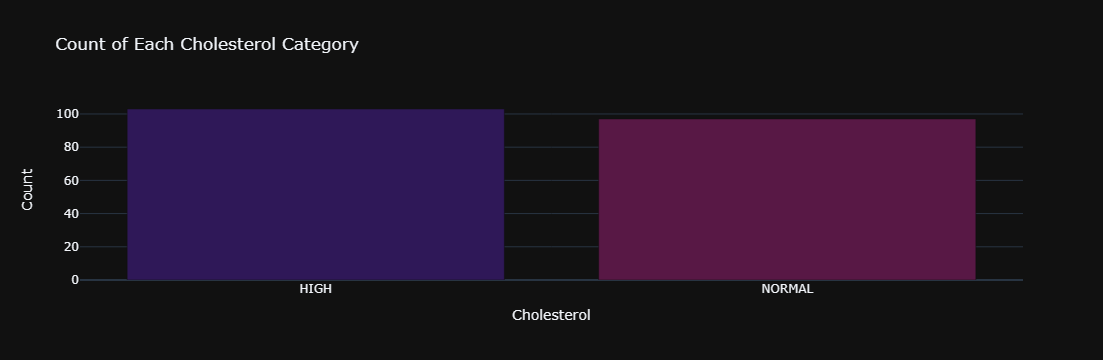

In [36]:
# Count occurrences of each cholesterol category
cholesterol_counts = df['Cholesterol'].value_counts().reset_index()

# Renaming columns for clarity
cholesterol_counts.columns = ['Cholesterol', 'Count']

# Plotting bar chart
fig_bar_cholesterol = px.bar(cholesterol_counts, x='Cholesterol', y='Count', title='Count of Each Cholesterol Category',template='plotly_dark')
fig_bar_cholesterol.update_layout(xaxis_title='Cholesterol', yaxis_title='Count')

# Changing the color of the bars
fig_bar_cholesterol.update_traces(marker_color=['#2f1858','#581845'])  # Setting the color of the bars

fig_bar_cholesterol.show()

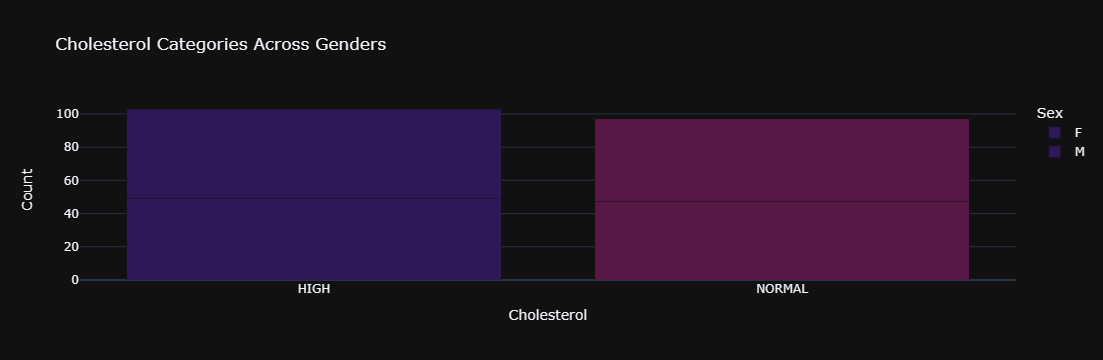

In [37]:
# Group by 'Cholesterol' and 'Sex', and count occurrences
cholesterol_sex_counts = df.groupby(['Cholesterol', 'Sex']).size().unstack().reset_index()

# Plotting stacked bar chart
fig_stacked_bar_cholesterol = px.bar(cholesterol_sex_counts, x='Cholesterol', y=['F', 'M'], barmode='stack',
                                     title='Cholesterol Categories Across Genders',template='plotly_dark')
fig_stacked_bar_cholesterol.update_layout(xaxis_title='Cholesterol', yaxis_title='Count', legend_title='Sex')

# Changing the color of the bars
fig_stacked_bar_cholesterol.update_traces(marker_color=['#2f1858','#581845'])  # Assigning colors to each gender

fig_stacked_bar_cholesterol.show()


There are 50 men and 47 women who have normal cholesterol, 54 men and 49 women who have high blood pressure

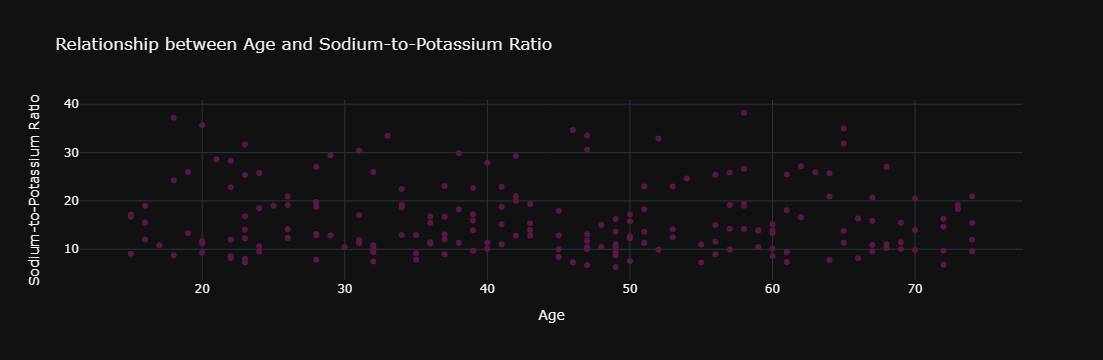

In [38]:
# Plotting scatter plot for 'Na_to_K' vs 'Age'
# Creating the scatter plot
fig_scatter_age = px.scatter(df, x='Age', y='Na_to_K', title='Relationship between Age and Sodium-to-Potassium Ratio',template='plotly_dark')
fig_scatter_age.update_layout(xaxis_title='Age', yaxis_title='Sodium-to-Potassium Ratio')

# Changing the marker color
fig_scatter_age.update_traces(marker=dict(color='#581845'))  # Setting the marker color

fig_scatter_age.show()

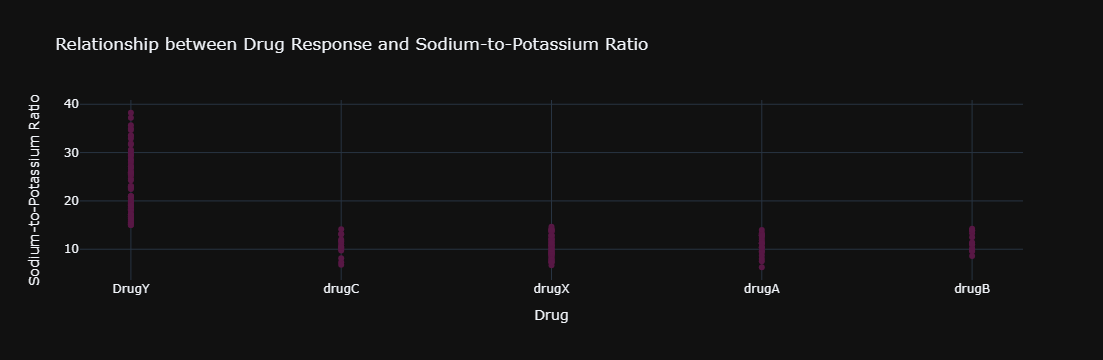

In [39]:
# Creating the scatter plot
fig_scatter_drug = px.scatter(df, x='Drug', y='Na_to_K', title='Relationship between Drug Response and Sodium-to-Potassium Ratio',template='plotly_dark')
fig_scatter_drug.update_layout(xaxis_title='Drug', yaxis_title='Sodium-to-Potassium Ratio')

# Changing the marker color
fig_scatter_drug.update_traces(marker=dict(color='#581845'))  # Setting the marker color

fig_scatter_drug.show()

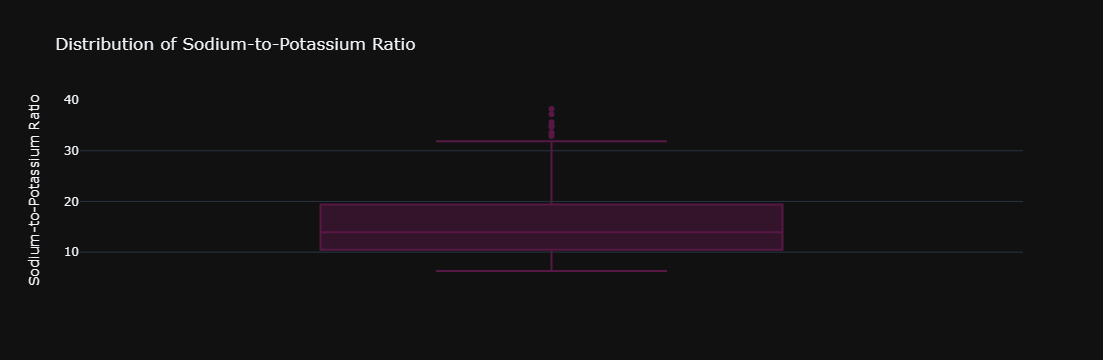

In [40]:
# Plotting box plot for 'Na_to_K'
fig_box = px.box(df, y='Na_to_K', title='Distribution of Sodium-to-Potassium Ratio',template='plotly_dark')
fig_box.update_layout(yaxis_title='Sodium-to-Potassium Ratio')

# Changing the color of the box plot
fig_box.update_traces(marker_color='#581845')  # Setting the color of the box plot

fig_box.show()


The maximum Sodium-to-Potassium Ratio is 38.247, the minimum Sodium-to-Potassium Ratio is 6.269 and the median value is 13.9365

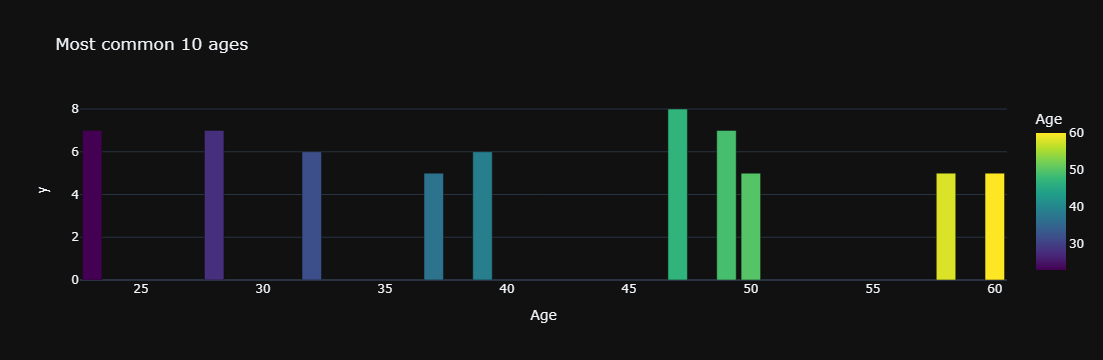

In [41]:
# Getting the ten most common ages
most10_ages = df['Age'].value_counts().head(10)

# Creating the bar chart with different colors for each bar
fig = px.bar(most10_ages, x=most10_ages.index, y=most10_ages.values, title='Most common 10 ages',
             color=most10_ages.index, color_continuous_scale='Viridis',template='plotly_dark')

fig.show()


The most common 10 ages are 47, 49, 28, 23, 32, 39, 37, 50, 58 and 60

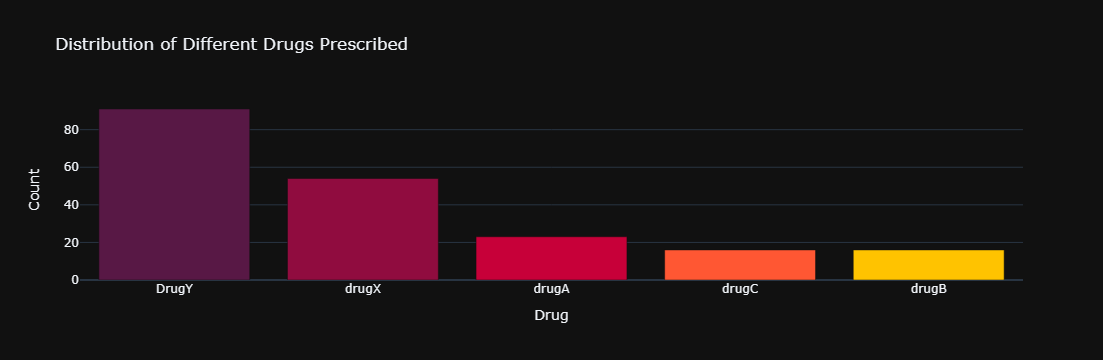

In [42]:
# Assuming 'drug_counts' contains data about drug counts

# Defining custom colors for each bar
custom_colors = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300']  # Add more colors as needed

# Creating the bar chart
fig_bar_drug = px.bar(drug_counts, x='Drug', y='Count', title='Distribution of Different Drugs Prescribed',template='plotly_dark')

# Changing the color of the bars
fig_bar_drug.update_traces(marker=dict(color=custom_colors))

fig_bar_drug.update_layout(xaxis_title='Drug', yaxis_title='Count')
fig_bar_drug.show()


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#581845;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model
</p>
</div>

In [43]:
numeric_transformer = Pipeline(steps=[ 
    ('scaler', StandardScaler())
])

In [44]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [45]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   

In [46]:
categorical_features= X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [47]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])

NameError: name 'preprocessor' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_predict= model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [ ]:
with open(r'D:\Drug Classification\app\api\models\pipeline.pickle', 'rb') as f:
    loaded_pipe = pickle.load(f)
    
model_evaluate(loaded_pipe)